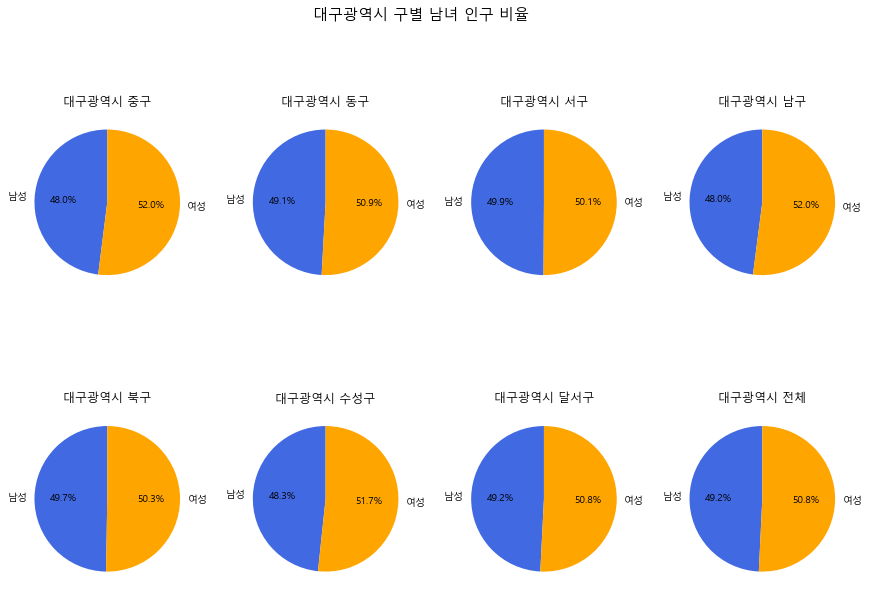

In [11]:
import csv
import matplotlib.pyplot as plt
import platform

# 파일 불러오기
f = open('gender.csv', encoding='euc_kr')
data = csv.reader(f)

# 필요한 변수 설정
subplot_index = 0
city_list=['대구광역시', '대구광역시 중구', '대구광역시 동구', '대구광역시 서구', '대구광역시 남구',
           '대구광역시 북구', '대구광역시 수성구', '대구광역시 달서구']

# 그래프 fig 설정
fig, axes = plt.subplots(2, 4, figsize=(15,10), sharex=True, sharey=True)
fig.suptitle('대구광역시 구별 남녀 인구 비율', fontsize=15)

# 리스트 요소들을 살펴보면서
for city in city_list:
    # 리스트 초기화
    male_list = []
    female_list = []
    # 모든 row를 살펴보면서
    for row in data:
        # 만약 '지역명'이 row[0]에 있으면
        if city in row[0]:
            for i in range(106,207):
                # 106~207 컬럼에 있는 데이터에 , 없애고 int값으로 male 리스트에 추가
                male_list.append(int(row[i].replace(',','')))
                # 209~310 컬럼에 있는 , 없애고 int값으로 male 리스트에 추가
                female_list.append(int(row[i+103].replace(',','')))
            break
        
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')
        
    # male_list의 합과 female_list 합을 저장
    population = [sum(male_list), sum(female_list)]
    color = ['royalblue', 'orange']
    
    # '전체' 부분을 맨 뒤로 보내고 
    if subplot_index== 0:
        plt.subplot(2, 4, 8)
        plt.title(city+' 전체')
    # 다른건 순서대로 
    else:
        plt.subplot(2, 4, subplot_index)
        plt.title(city)
    
    # 각 파이 그리기
    plt.pie(population, labels=['남성', '여성'], autopct='%.1f%%', colors=color, startangle=90)
    # subplot_index + 1
    subplot_index += 1
f.close()